# **Exploratory Data Analysis and Classification: Titanic Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")
all_data = pd.concat([train_data, test_data],ignore_index=True)

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(f"No. of training samples: {len(train_data)}")
print(f"No. of test samples: {len(test_data)}")

No. of training samples: 891
No. of test samples: 418


In [ ]:
all_data.shape

(1309, 12)

**Visualization of Survival Rate**

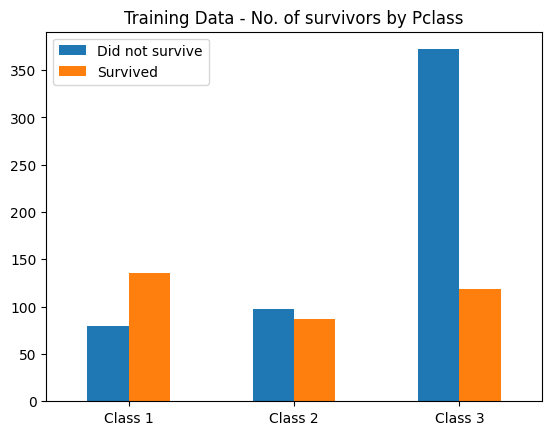

In [ ]:
#Number of Survivors by Ticket Class
p1_survive = sum(train_data[train_data.Pclass == 1].Survived == 1)
p2_survive = sum(train_data[train_data.Pclass == 2].Survived == 1)
p3_survive = sum(train_data[train_data.Pclass == 3].Survived == 1)

pclass_df = pd.DataFrame(
    {"Did not survive":{"Class 1": sum(train_data.Pclass == 1)-p1_survive,
                        "Class 2": sum(train_data.Pclass == 2)-p2_survive,
                        "Class 3": sum(train_data.Pclass == 3)-p3_survive},
     "Survived":{"Class 1": p1_survive, "Class 2": p2_survive, "Class 3": p3_survive}})
pclass_df.plot.bar(width=0.5).set_title("Training Data - No. of survivors by Pclass")
plt.xticks(rotation=0)
plt.show()

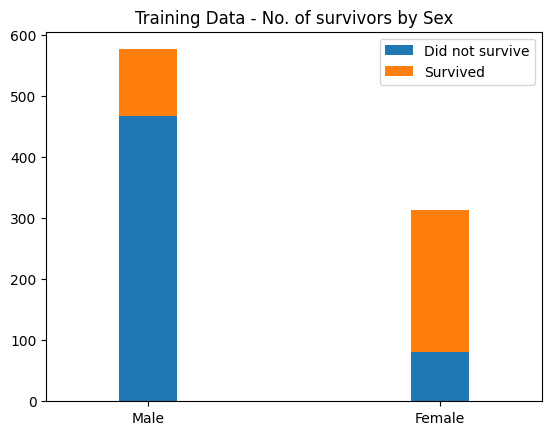

In [ ]:
#Number of Surivors by Sex
male_survive = sum(train_data[train_data.Sex == "male"].Survived == 1)
fem_survive = sum(train_data[train_data.Sex == "female"].Survived == 1)

sex_df = pd.DataFrame(
    {"Did not survive":{"Male":   sum(train_data.Sex == "male")-male_survive,
                        "Female": sum(train_data.Sex == "female")-fem_survive},
     "Survived":{"Male": male_survive, "Female": fem_survive}})
sex_df.plot.bar(stacked=True, width=0.2).set_title("Training Data - No. of survivors by Sex")
plt.xticks(rotation=0)
plt.show()

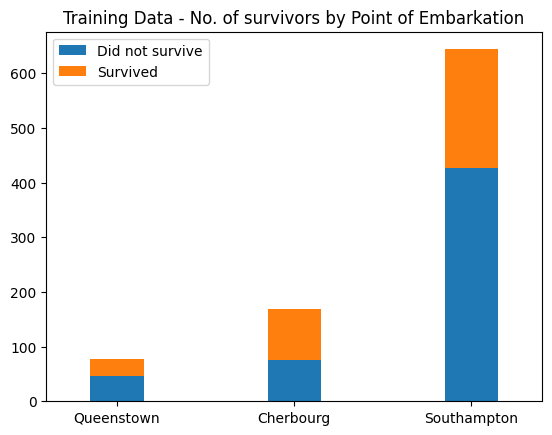

In [ ]:
#Number of Survivors by Point of Embarkation
Q_survive = sum(train_data[train_data.Embarked == "Q"].Survived == 1)
C_survive = sum(train_data[train_data.Embarked == "C"].Survived == 1)
S_survive = sum(train_data[train_data.Embarked == "S"].Survived == 1)

sex_df = pd.DataFrame(
    {"Did not survive":{"Queenstown": sum(train_data.Embarked == "Q")-Q_survive,
                        "Cherbourg": sum(train_data.Embarked == "C")-C_survive,
                        "Southampton": sum(train_data.Embarked == "S")-S_survive},
     "Survived":{"Queenstown": Q_survive, "Cherbourg": C_survive, "Southampton": S_survive}})
sex_df.plot.bar(stacked=True, width=0.3).set_title("Training Data - No. of survivors by Point of Embarkation")
plt.xticks(rotation=0)
plt.show()

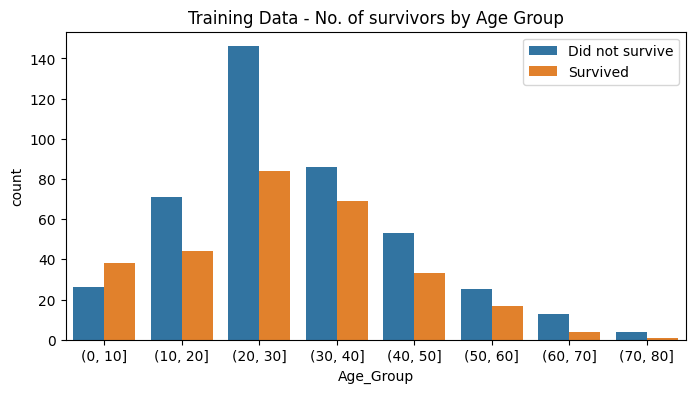

In [ ]:
#Number of Surivivors by Age Group
plt.figure(figsize=(8,4))
train_data['Age_Group'] = pd.cut(train_data.Age, np.arange(0, 90, 10))
sns.countplot(x="Age_Group", hue="Survived", data=train_data).legend(labels = ["Did not survive", "Survived"])
plt.title('Training Data - No. of survivors by Age Group')
plt.show()

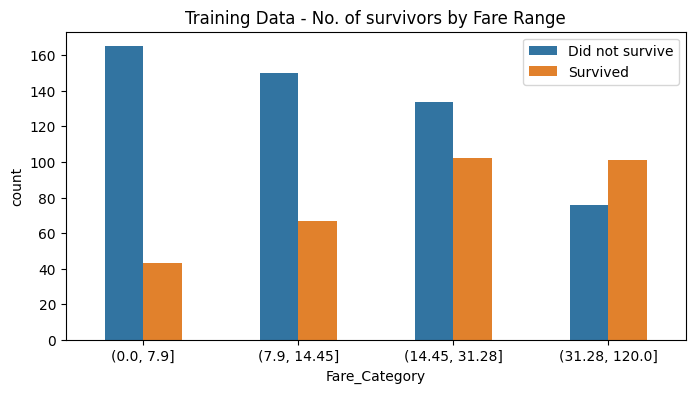

In [ ]:
#Number of Survivors by Fare Range
plt.figure(figsize=(8,4))
train_data['Fare_Category'] = pd.cut(train_data['Fare'],
                                     bins=[0,7.90,14.45,31.28,120])
sns.countplot(x="Fare_Category", hue="Survived", data=train_data, width=0.5).legend(labels = ["Did not survive", "Survived"])
plt.title("Training Data - No. of survivors by Fare Range")
plt.show()

**Feature Selection**

In [ ]:
train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age_Group', 'Fare_Category'], inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Dealing with Missing Data**

In [ ]:
missing_data = train_data.isnull().sum()
print(missing_data)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [ ]:
imp = SimpleImputer(strategy='mean')
train_data['Age'] = imp.fit_transform(train_data['Age'].values.reshape(-1, 1))
print(train_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [ ]:
imp = SimpleImputer(strategy='most_frequent')
# Convert the result of fit_transform to a 1D array
train_data['Embarked'] = imp.fit_transform(train_data['Embarked'].values.reshape(-1, 1)).ravel()
print(train_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Column Transformation**

In [ ]:
preprocessing = ColumnTransformer(
    transformers=[("cat", OrdinalEncoder(), ["Pclass", "Sex", "Embarked"]),
                  ("num", StandardScaler(), ["Age", "Fare"])],
    remainder="passthrough",
    verbose_feature_names_out=False
)

In [ ]:
X = train_data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Let's just see what happens to the data after preprocessing
display(X_train)
X2 = preprocessing.fit_transform(X_train)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,male,51.000000,0,0,26.5500,S
52,1,female,49.000000,1,0,76.7292,C
386,3,male,1.000000,5,2,46.9000,S
124,1,male,54.000000,0,1,77.2875,S
578,3,female,29.699118,1,0,14.4583,C
...,...,...,...,...,...,...,...
835,1,female,39.000000,1,1,83.1583,C
192,3,female,19.000000,1,0,7.8542,S
629,3,male,29.699118,0,0,7.7333,Q
559,3,female,36.000000,1,0,17.4000,S


In [ ]:
X2 = X2[:,np.array([0, 1, 3, 5, 6, 4, 2])] #rearrange columns to match the original df for comparison purposes
X2 = pd.DataFrame(X2, columns=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
display(X2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.623937,0.0,0.0,-0.122530,2.0
1,0.0,0.0,1.470203,1.0,0.0,0.918124,0.0
2,2.0,1.0,-2.219399,5.0,2.0,0.299503,2.0
3,0.0,1.0,1.854537,0.0,1.0,0.929702,2.0
4,2.0,0.0,-0.013392,1.0,0.0,-0.373297,0.0
...,...,...,...,...,...,...,...
618,0.0,0.0,0.701536,1.0,1.0,1.051455,0.0
619,2.0,0.0,-0.835798,1.0,0.0,-0.510258,2.0
620,2.0,1.0,-0.013392,0.0,0.0,-0.512765,1.0
621,2.0,0.0,0.470936,1.0,0.0,-0.312290,2.0


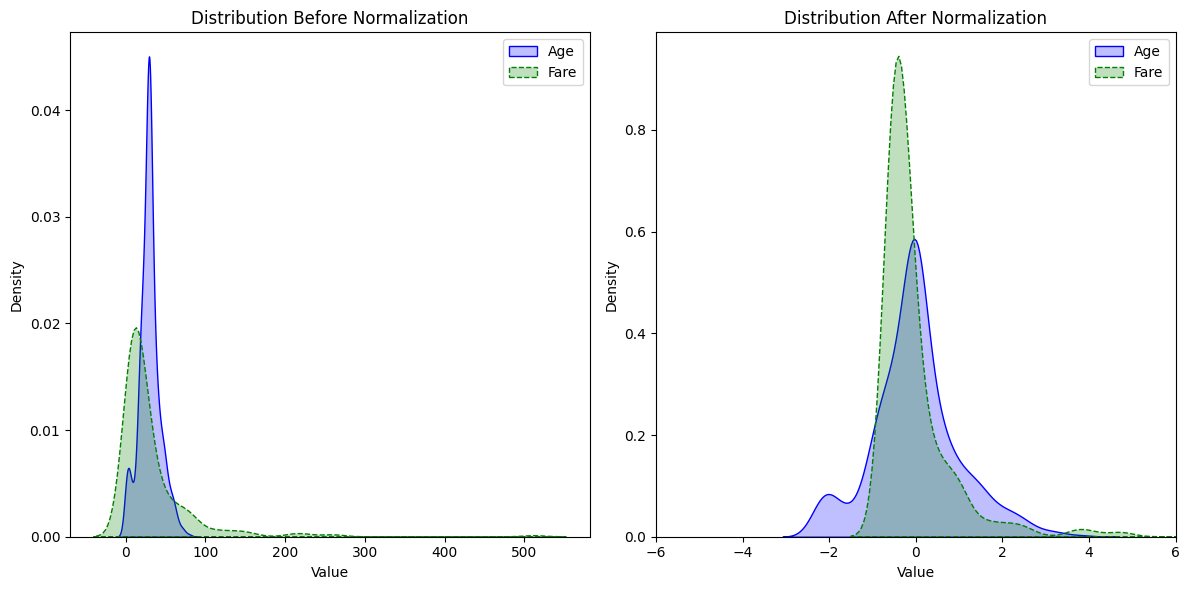

In [ ]:
## THIS CODE SECTION IS CHATGPT GENERATED

# Create figure for the plots
plt.figure(figsize=(12, 6))

# First plot: Age and Fare before normalization
plt.subplot(1, 2, 1)
sns.kdeplot(X_train['Age'].dropna(), label='Age', color='blue', fill=True)
sns.kdeplot(X_train['Fare'].dropna(), label='Fare', color='green', linestyle='--', fill=True)

plt.title('Distribution Before Normalization')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper right')

# Second plot: Age and Fare after normalization (focused on -6 to 6 range)
plt.subplot(1, 2, 2)
sns.kdeplot(X2['Age'].dropna(), label='Age', color='blue', fill=True)
sns.kdeplot(X2['Fare'].dropna(), label='Fare', color='green', linestyle='--', fill=True)

plt.xlim(-6, 6)  # Set the x-axis range to [-6, 6]
plt.title('Distribution After Normalization')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

**Training the ML Classifier**

RF train accuracy: 0.979
RF test accuracy: 0.821


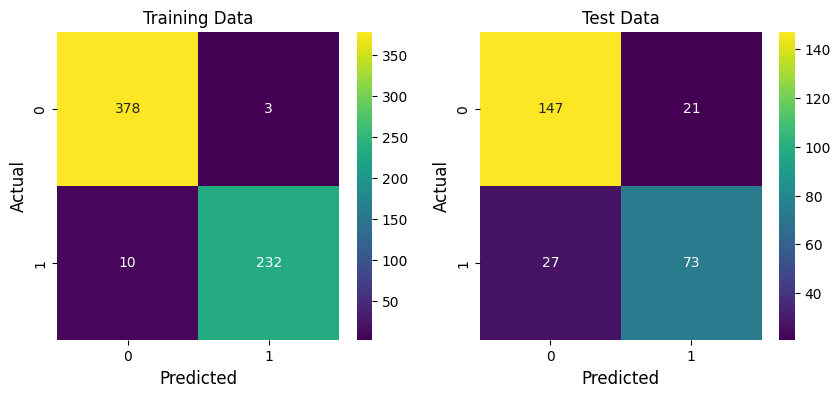

In [ ]:
rf = Pipeline([("preprocess", preprocessing),
               ("classifier", RandomForestClassifier(n_estimators=500,max_depth=20,random_state=2))])

rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt="g", cmap='viridis')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Training Data', fontsize=12)
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt="g", cmap='viridis')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Test Data', fontsize=12)
plt.show()

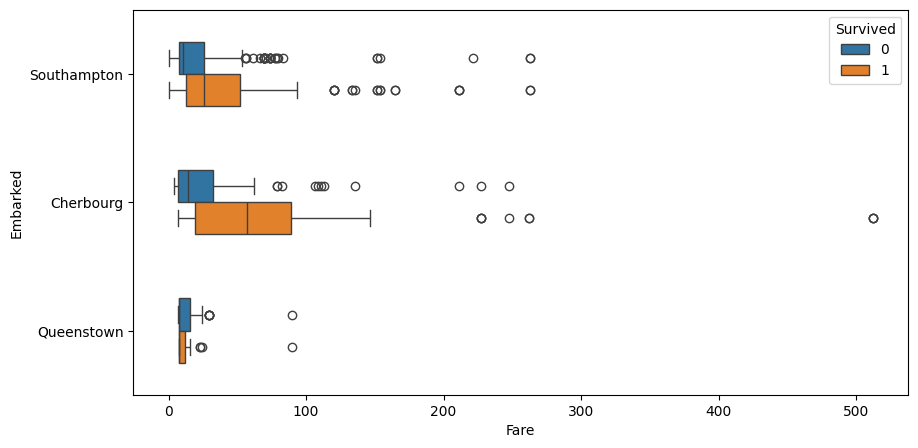

In [ ]:
#For boxplot lecture
plt.figure(figsize=(10,5))
sns.boxplot(x="Fare", y="Embarked", hue="Survived",
            data=train_data, orient="h", width=0.5)
plt.rc('axes', labelsize=15)
plt.yticks([0,1,2],["Southampton","Cherbourg","Queenstown"])
plt.show()